In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# This is for testing the update function with GitHub

In [2]:
def HHP_0(Pgb_m,Pemax=5): #input: HP capacity, boiler monitored gas consumption
    if pd.isna(Pgb_m):
        De=None
        Dg=None
        Pe_in=None
        Pg_in=None
    else:
        Pout = float(Pgb_m)*0.9
        if Pout <= Pemax:
            De = Pout
            Dg= 0
        else:
            De = Pemax
            Dg = (Pout-Pemax)
            
        Pe_in = De/3
        Pg_in = Dg/0.9
    return De,Dg,Pe_in,Pg_in #output, demand electrified, electricity and gas consumptions



In [3]:
gas_con = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\combined_consumption_WODHW.csv',index_col=0)


df_transformed = gas_con.applymap(lambda x: HHP_0(x,1.75))

# 提取不同的输出到不同的 DataFrame 中
De = df_transformed.applymap(lambda x: x[0])
Pe_in = df_transformed.applymap(lambda x: x[2])
Pg_in = df_transformed.applymap(lambda x: x[3])

De.to_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\kW3.5\electrified_heat.csv')
Pe_in.to_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\kW3.5\E_consumption.csv')
Pg_in.to_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\kW3.5\Gas_consumption.csv')

C:\Users\jg421\AppData\Local\Temp\ipykernel_10012\1096323125.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_transformed = gas_con.applymap(lambda x: HHP_0(x,1.75))
C:\Users\jg421\AppData\Local\Temp\ipykernel_10012\1096323125.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  De = df_transformed.applymap(lambda x: x[0])
C:\Users\jg421\AppData\Local\Temp\ipykernel_10012\1096323125.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Pe_in = df_transformed.applymap(lambda x: x[2])
C:\Users\jg421\AppData\Local\Temp\ipykernel_10012\1096323125.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Pg_in = df_transformed.applymap(lambda x: x[3])


In [ ]:
print(gas_con.head(50))

In [22]:
gas_con=pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_with hot water\combined_consumption_kWh.csv',index_col=0)
De=pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_with hot water\electrified_heat.csv',index_col=0)

In [ ]:
print("The total heating demand is (kWh)")
a=gas_con.sum().sum()*0.9
print(a)
b=De.sum().sum()
print('electrified by HP component (kWh)')
print(De.sum().sum())

print("percentage is "+str((100*b/a))+"%")

In the next blocks, different capacities of HP component (in kW) in HHP will be tested, to get the proportion of heating demand electrified

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
gas_con = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\combined_consumption_WODHW.csv',index_col=0)
gas_con.index = pd.to_datetime(gas_con.index)

In [8]:
def HHP_0_for_De(Pgb_m,Pemax):
    if pd.isna(Pgb_m):
        De=None
    else:
        Pout = float(Pgb_m)*0.9
        if Pout <= Pemax:
            De = Pout
        else:
            De = Pemax
            
    return De #output, demand electrified, electricity and gas consumptions

In [9]:
window_h = 2
a=gas_con.sum().sum()*0.9
Pm_values_0 = list(np.arange(0.5, 15,0.5).round(1))+(list(range(15,22)))
Pm_values = [2*window_h*k for k in Pm_values_0]
percentages = []
print(Pm_values)
freq = str(window_h*60)+"min"
gas_con = gas_con.resample(freq).sum()

[2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60, 64, 68, 72, 76, 80, 84]


In [10]:
n=3
for Pm in tqdm(Pm_values, desc="Calculating percentages for "+window_h+"hr window"):
    De = gas_con.map(lambda x: HHP_0_for_De(x, Pemax=Pm))
    De_sum = De.sum().sum()
    per = 100 * De_sum / a
    percentages.append(per)
    # n-=1
    # if n==0:
    #     break

Calculating percentages: 100%|██████████| 36/36 [03:05<00:00,  5.14s/it]


In [13]:
Pm_=[2*i for i in Pm_values_0]

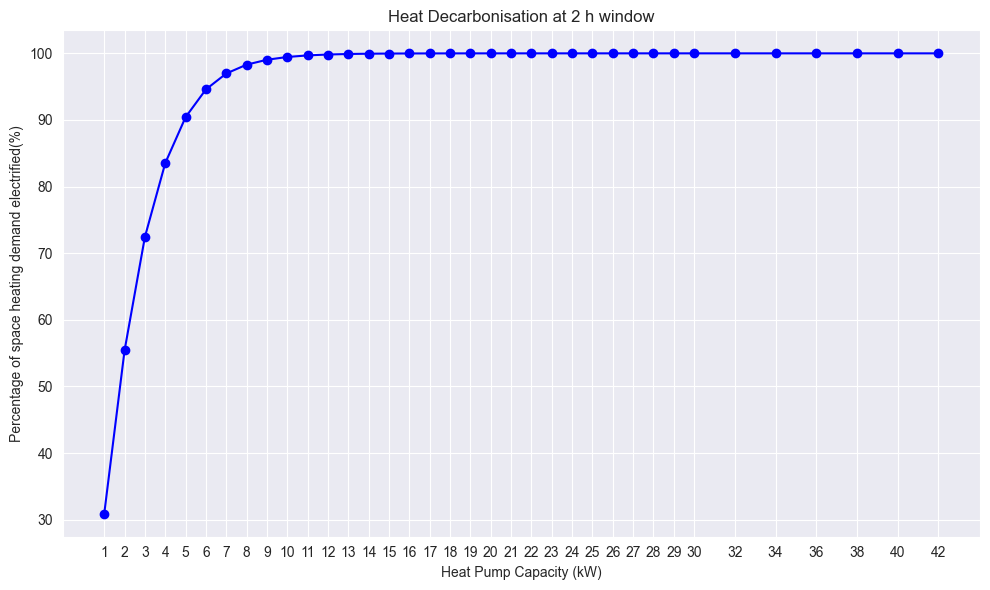

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(Pm_, percentages, marker='o', linestyle='-', color='b')
plt.title(f'Heat Decarbonisation at {window_h} h window')
plt.xlabel('Heat Pump Capacity (kW)')
plt.ylabel('Percentage of space heating demand electrified(%)')
plt.grid(True)
plt.xticks(Pm_)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# 读取数据
gas_con = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\combined_consumption_WODHW.csv', index_col=0)
gas_con.index = pd.to_datetime(gas_con.index)
a=gas_con.sum().sum()*0.9
# 定义函数
def HHP_0_for_De(Pgb_m, Pemax):
    if pd.isna(Pgb_m):
        De = None
    else:
        Pout = float(Pgb_m) * 0.9
        if Pout <= Pemax:
            De = Pout
        else:
            De = Pemax
    return De  # output, demand electrified, electricity and gas consumptions

# 定义采样窗口
window_hours_list = [0.5,1, 2, 3, 6, 12]  # 例如，1小时、2小时和3小时
Pm_values_0 = list(np.arange(0.5, 10, 0.5).round(1))

# 存储所有结果
results = {}

# 计算不同采样窗口下的百分比
for window_h in window_hours_list:
    Pm_values = [2 * window_h * k for k in Pm_values_0]
    percentages = []
    freq = str(window_h * 60) + "min"
    gas_con_resampled = gas_con.resample(freq).sum()

    for Pm in tqdm(Pm_values, desc=f"Calculating percentages for {window_h}hr window"):
        De = gas_con_resampled.map(lambda x: HHP_0_for_De(x, Pemax=Pm))
        De_sum = De.sum().sum()
        per = 100 * De_sum / a
        percentages.append(per)

    results[f"{window_h}hr"] = percentages

# 保存原始数据到CSV
output_data = pd.DataFrame(results, index=[2 * k for k in Pm_values_0])
output_data.to_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\decarbonisation_percentages_kWh.csv')

Calculating percentages for 12hr window: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]


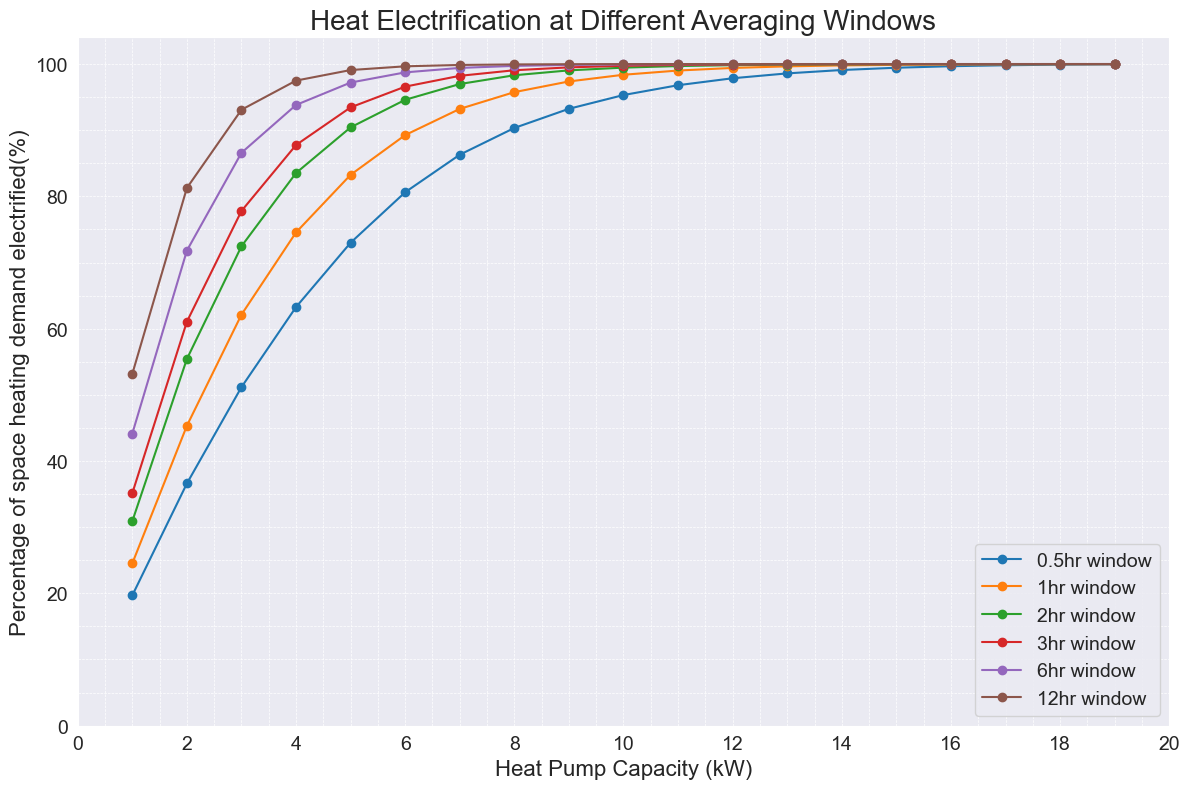

In [23]:

results = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\results\decarbonisation_percentages_kWh.csv', index_col=0)
window_hours_list = [0.5, 1, 2, 3, 6, 12]

plt.figure(figsize=(12, 8))

# Plotting each window
for window_h in window_hours_list:
    plt.plot(results.index, results[f"{window_h}hr"], marker='o', linestyle='-', label=f'{window_h}hr window')

# Title and labels with larger fonts
plt.title('Heat Electrification at Different Averaging Windows', fontsize=20)
plt.xlabel('Heat Pump Capacity (kW)', fontsize=16)
plt.ylabel('Percentage of space heating demand electrified(%)', fontsize=16)

# Grid and ticks
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Sparsify the ticks with larger font
x_ticks = np.arange(0, 21, 2)
y_ticks = np.arange(0, 101, 20)
plt.xticks(x_ticks, fontsize=14)
plt.yticks(y_ticks, fontsize=14)

# Legend with larger font
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


In the next, the capacity of HP will be in percentage of the capacity of each households' boiler

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
gas_con = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\combined_consumption_WODHW.csv',index_col=0)
Cgb = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\PowerMaxT.csv',index_col=0)


In [34]:
gas_con.index = pd.to_datetime(gas_con.index)
C_per_list = list(np.arange(0.05,1.05,0.05).round(2))
a=gas_con.sum().sum()*0.9
n=3
window_hours_list = [0.5,1, 2, 3, 6, 12]

In [35]:
for window_h in window_hours_list:
    percentages = []
    freq = str(window_h * 60) + "min"
    gas_con_resampled = gas_con.resample(freq).sum()
    for C_per in tqdm(C_per_list, desc=f"Calculating percentages for {window_h}hr window"):
        C= Cgb*C_per*window_h
        De= gas_con.apply(lambda col: col.map(lambda x: HHP_0_for_De(x, C[col.name].iloc[0])), axis=0)
        De_sum = De.sum().sum()
        per=De_sum*100/a
        percentages.append(per)
        # n-=1
        # if n==0:
        #     break
    results[f"{window_h}hr"] = percentages

Calculating percentages for 12hr window: 100%|██████████| 20/20 [1:26:56<00:00, 260.84s/it]


In [31]:
print(results)

{'0.5hr': [23.307753139303912, 42.71582154524267], '1hr': [24.52717237883161, 45.32775716994395, 62.120900594534824, 74.5521582966353, 83.25787864551815, 89.26172251826985, 93.21879397469503, 95.75225373146077, 97.36599066848628, 98.37925385930716, 99.01491162271058, 99.40967687540169, 99.64885303729925, 99.79267318418258, 99.87717128801438, 99.92839051134858, 99.95908420516061, 99.97780048008781, 99.98908535781979, 99.99570300241822, 99.99878140224824, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], '2hr': [30.906605774982477, 55.41831360285547, 72.45743116394155, 83.52883494179845, 90.4293284846982, 94.59316563640084, 96.97605993237342, 98.30277909582581, 99.0401990360391, 99.45539738630825, 99.69144378400084, 99.82710564199807, 99.9028285247263, 99.94527249497408, 99.96902211423743, 99.98232726654518, 99.98988452297218, 99.9944015657905, 99.99719726970793, 99.9987268992562, 99.99961249560916, 100.0, 100.0, 100.0, 100.0, 100.0

In [36]:
output_data = pd.DataFrame(results, index=C_per_list)
output_data.to_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\decarbonisation_percentages.csv')

In [ ]:
C_per_list = [100*i for i in C_per_list]

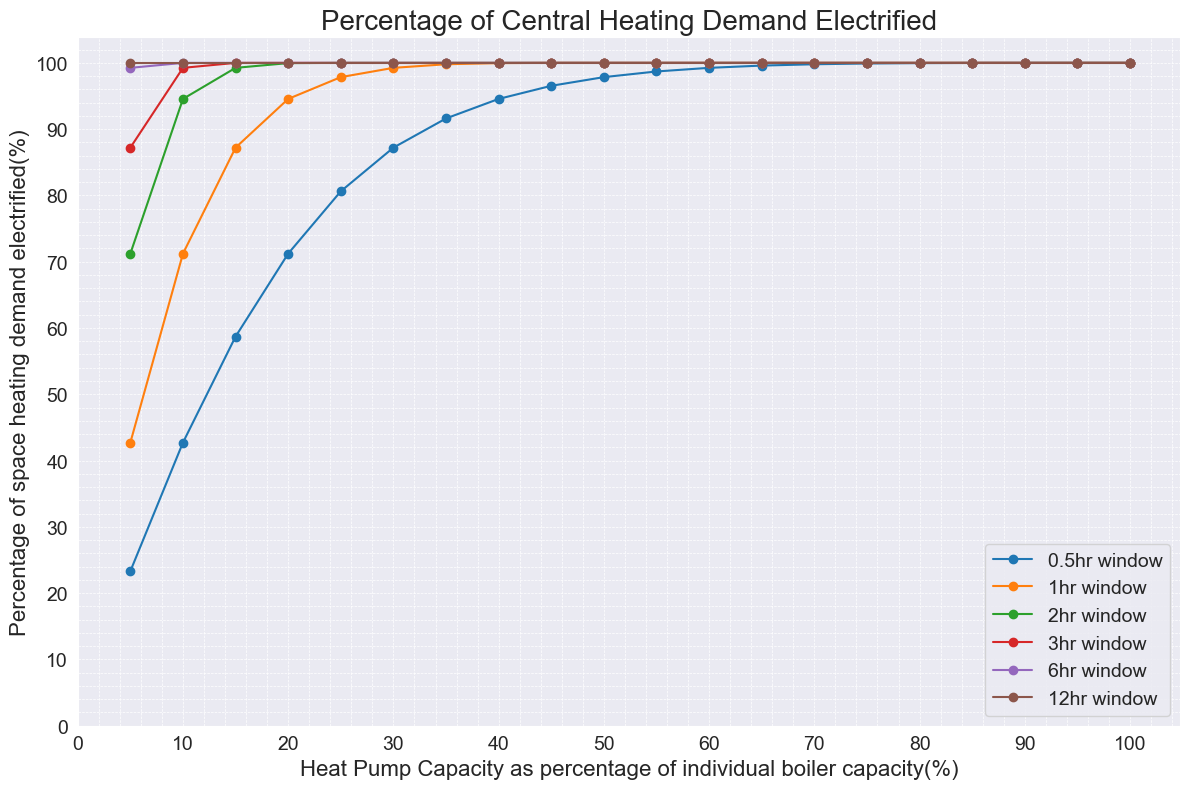

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\results\decarbonisation_percentages.csv', index_col=0)
window_hours_list = [0.5, 1, 2, 3, 6, 12]

plt.figure(figsize=(12, 8))

# Plotting each window
for window_h in window_hours_list:
    plt.plot(df.index * 100, df[f"{window_h}hr"], marker='o', linestyle='-', label=f'{window_h}hr window')

# Title and labels with larger fonts
plt.title('Percentage of Central Heating Demand Electrified', fontsize=20)
plt.xlabel('Heat Pump Capacity as percentage of individual boiler capacity(%)', fontsize=16)
plt.ylabel('Percentage of space heating demand electrified(%)', fontsize=16)

# Grid and ticks
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Sparsify the ticks
x_ticks = np.arange(0, 101, 10)  # Increased step size to make ticks sparser
y_ticks = np.arange(0, 101, 10)
plt.xticks(x_ticks, fontsize=14, rotation=0)
plt.yticks(y_ticks, fontsize=14)

# Legend with larger font
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

In [66]:
print(percentages)
print(C_per_list)

[]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


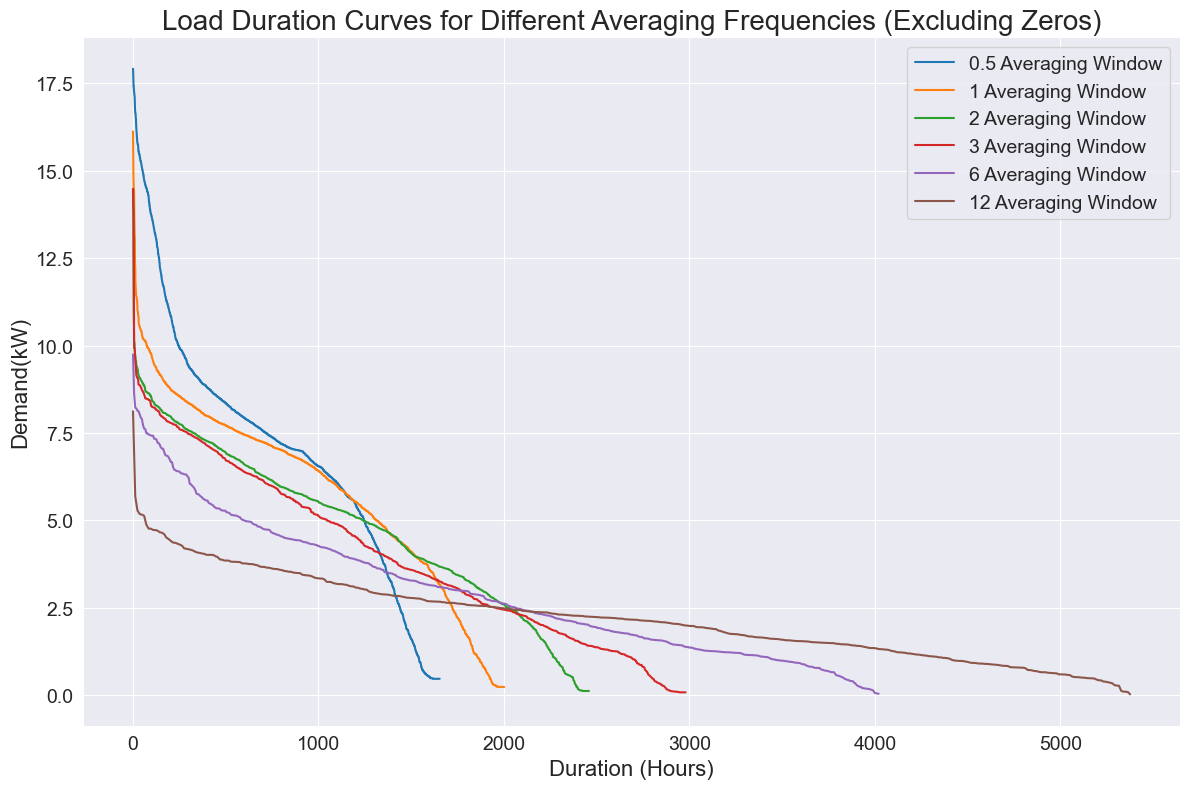